In [165]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

## assign SICs

In [166]:
sics = pd.read_csv('1504_Companies_MASTER.csv', dtype={'SIC': 'S'})
sics = sics[['SIC','SIC Description']].drop_duplicates(keep="first")

In [167]:
cs = pd.read_csv('companies-and-sectors')

In [168]:
country = pd.read_csv('csv/country31may2015.csv',
                     dtype={'CIKNUMBER': 'I',
                           'IRSNUMBER': 'S',
                           'TAXHAVEN': 'S'} )

CIKNUMBER - chamber of commerce nr <br>
IRSNUMBER - tax number <br>
NAME - company name <br>
DATADATE - date of establishment <br>
FILEDATE - file date <br>
INCSTATE - state of incorporation <br>
HQSTATE - state where headquarters is <br>
ISO3 - subsidiary ISO3 <br>
COUNTRY - subsidiary company country <br>
TAXHAVEN - subsidiary company a tax haven? <br>
COUNTRYCOUNT - amount of branches in the country <br>
TOTALCOUNT - total amount of subsidiary branches <br>
NCOUNTRIES - total amount of countries with subsidiaries <br>


merge all according to SICS

In [182]:
merged = pd.merge(left=country, right=cs, left_on ="CIKNUMBER", right_on="cik")
merged['year'] = pd.to_datetime(merged['DATADATE']).dt.year

In [189]:
filtered.index.levels[0].tolist()[7:]

[1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014]

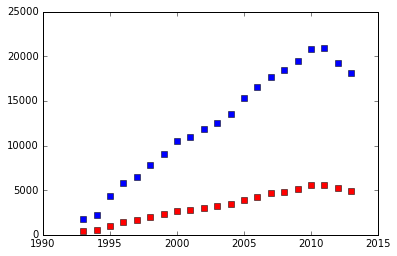

In [191]:
filtered = pd.DataFrame(merged.groupby(by=['year', 'TAXHAVEN']).count()['NAME'])
plt.plot(filtered.index.levels[0].tolist()[7:-1], filtered.filter(like='1.0', axis =0)['NAME'].tolist()[:-1],
         'rs',filtered.index.levels[0].tolist()[7:-1],filtered.filter(like='0.0', axis =0)['NAME'].tolist()[:-1],'bs')

merge only extractive according to to SICS

In [ ]:
extractive = pd.merge(left=merged, right=sics, left_on = "sic", right_on="SIC")

In [ ]:
extractive['year'] = pd.to_datetime(extractive['DATADATE']).dt.year

In [ ]:
extractive = pd.DataFrame(extractive.groupby(by=['year', 'TAXHAVEN']).count()['NAME'])

In [ ]:
extractive.head()

In [ ]:
extractive.filter(like='1.0', axis =0)['NAME'].tolist()

In [ ]:
plt.plot(extractive.index.levels[0].tolist()[:-1], extractive.filter(like='1.0', axis =0)['NAME'].tolist()[:-1],
         'rs',extractive.index.levels[0].tolist()[:-1],extractive.filter(like='0.0', axis =0)['NAME'].tolist()[:-1],'bs')